In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [2]:
datos = sns.load_dataset('iris')

In [3]:
datos.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
datos.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
datos.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
datos.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
matriz_correlacion = datos.corr()
matriz_correlacion

<ipython-input-8-363176aadccf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = datos.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


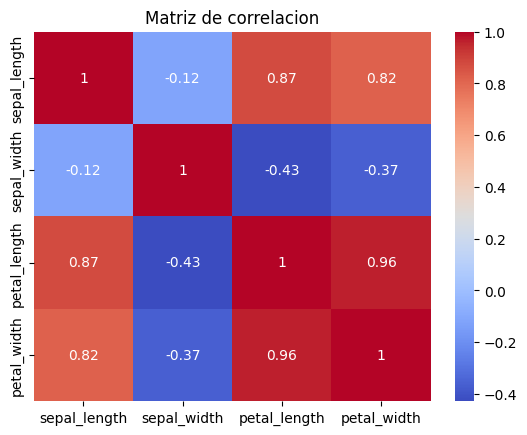

In [9]:
sns.heatmap(matriz_correlacion, annot= True, cmap='coolwarm')
plt.title("Matriz de correlacion")
plt.show()

In [10]:
X = datos.drop('species',axis=1)
y = datos['species']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [12]:
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
joblib.dump(modelo_rf, "modelo_random_forest.pkl")

['modelo_random_forest.pkl']

In [14]:
modelo_cargado = joblib.load('modelo_random_forest.pkl')

In [15]:
nuevos_datos = [[5.1,3.5,1.4,0.2]]
prediccion = modelo_cargado.predict(nuevos_datos)
print("Prediccion: ", prediccion)

Prediccion:  ['setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [16]:
y_pred_test = modelo_cargado.predict(X_test)
precision = accuracy_score(y_test, y_pred_test)
print("Precision del modelo: ",precision)
print("Reporte de clasificacion: ")
print(classification_report(y_test, y_pred_test))

Precision del modelo:  1.0
Reporte de clasificacion: 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

